## Notebook Imports and Packages

In [66]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1

$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num =100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [4]:
## Derivative of f(x)

In [5]:
def derivative(x):
    return 2*x + 1

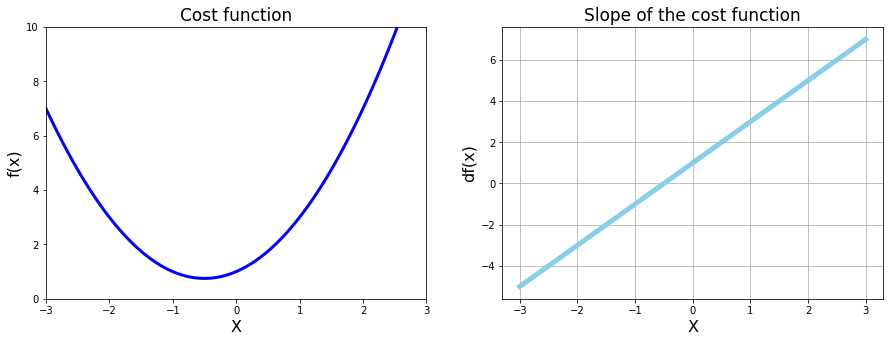

In [6]:
#plot fucntion and derivative side by side
#subplot(row, coloumn, index)

plt.figure(figsize=[15,5])

# 1 chart : Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,10])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# 2 chart : Derivative 
plt.subplot(1,2,2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.grid()
plt.plot(x_1, derivative(x_1), color="skyblue", linewidth=5)

plt.show()





## Gradient Descent

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [derivative(new_x)]

for n in range(50):
    previous_x = new_x
    gradient = derivative(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size  = abs(new_x - previous_x)
    #print(step_size)
    x_list.append(new_x)
    slope_list.append(derivative(new_x))
    
    if step_size < precision:
        print("Loop ran this many times", n)
        break
    
print("local minimum occours at:" , new_x)
print(f"Slope or df(x) value at this point is: {derivative(new_x)}")
print("f(x) value or cost at this point is :", f(new_x))

Loop ran this many times 40
local minimum occours at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is : 0.7500001385208099


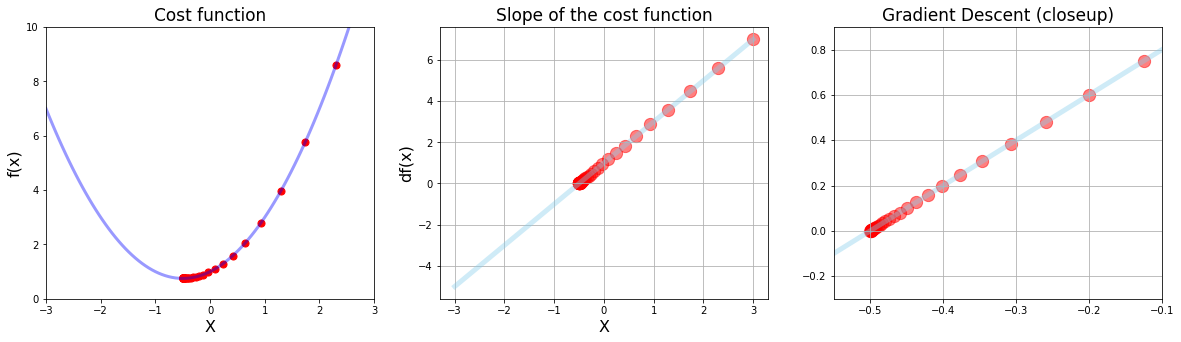

In [8]:
#plot fucntion and derivative side by side
#subplot(row, coloumn, index)

plt.figure(figsize=[20,5])

# 1 chart : Cost function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim([0,10])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha = 0.4)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = "red", s=50)

# 2 chart : Derivative 
plt.subplot(1,3,2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.grid()
plt.plot(x_1, derivative(x_1), color="skyblue", linewidth=5, alpha=0.4)
plt.scatter(x_list, slope_list, color ="red", s = 150, alpha = 0.5)

# 2 chart : Derivative 
plt.subplot(1,3,3)
plt.title("Gradient Descent (closeup)", fontsize=17)
plt.grid()
plt.xlim(-0.55, -0.1)
plt.ylim(-0.3, 0.9)

plt.plot(x_1, derivative(x_1), color="skyblue", linewidth=5, alpha=0.4)
plt.scatter(x_list, slope_list, color ="red", s = 150, alpha = 0.5)

plt.show()


# Example 2 - Multiple Minima vs Initial Guess &  Advanced functions
## $$g(x) = x^4 - 4x^2 + 5 $$


In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

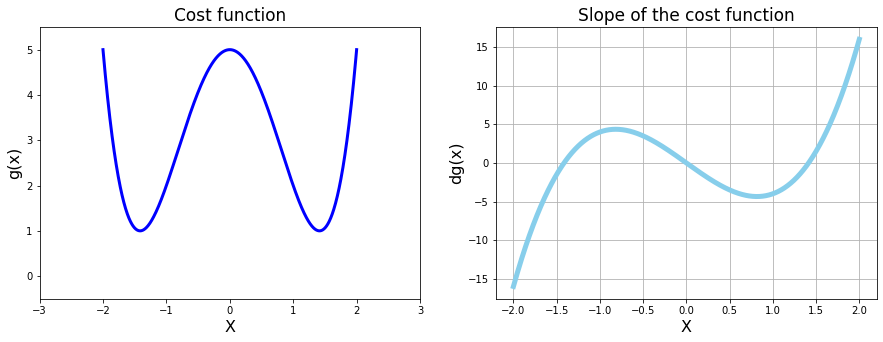

In [10]:
plt.figure(figsize=[15,5])

# 1 chart : Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([-0.5,5.5])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

# 2 chart : Derivative 
plt.subplot(1,2,2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)

plt.show()

# Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivative_function, initial_guess, multiplier, precision=0.0001, max_iter = 50):
    new_x = initial_guess
#     previous_x = 0
#     step_multiplier = 0.1
#     precision = 0.0001

    x_list = [new_x]
    slope_list = [derivative_function(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size  = abs(new_x - previous_x)
        #print(step_size)
        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))

        if step_size < precision:
#             print("Loop ran this many times", n)
            break
    
    return new_x, x_list, slope_list

#     print("local minimum occours at:" , new_x)
#     print(f"Slope or df(x) value at this point is: {derivative(new_x)}")
#     print("f(x) value or cost at this point is :", f(new_x))

In [138]:
local_min, list_x, deriv_list = gradient_descent(dg, 2, 0.02, 0.001)
print("local min occurs at :", local_min)
print("Number of steps :", len(list_x))
print("x_list:", list_x)
print("slope_list:", deriv_list)

local min occurs at : 1.4159909120185952
Number of steps : 14
x_list: [2, 1.68, 1.56946944, 1.5113068709076014, 1.4769641200015622, 1.4555276976871743, 1.4417222062583557, 1.4326609337480265, 1.4266417691682367, 1.422612163848143, 1.4199006230992142, 1.4180697714893638, 1.4168307328209733, 1.4159909120185952]
slope_list: [16, 5.526527999999997, 2.908128454619934, 1.7171375453019646, 1.0718211157193949, 0.6902745714409324, 0.45306362551645485, 0.30095822898949365, 0.20148026600468327, 0.13557703744643845, 0.09154258049252029, 0.06195193341952354, 0.04199104011889965, 0.028491226314905305]


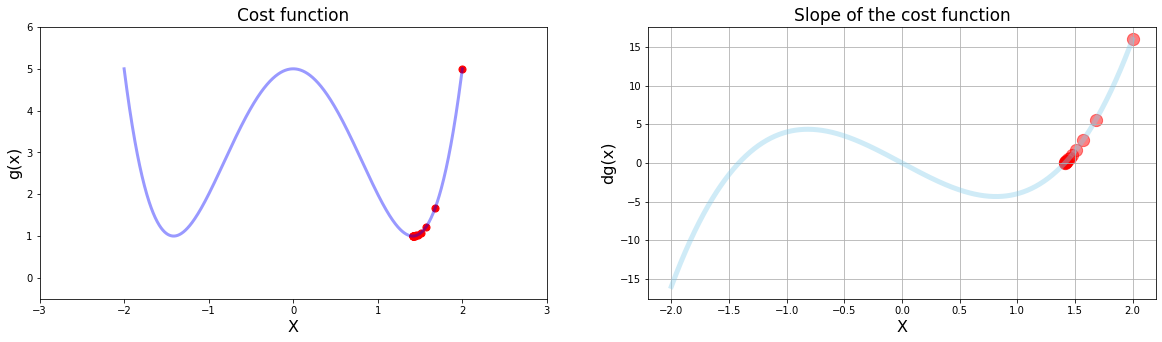

In [139]:
#plot fucntion and derivative and scatter side by side
#calling gradi

plt.figure(figsize=[20,5])

# 1 chart : Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([-0.5,6])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha = 0.4)

# values = np.array(x_list)
plt.scatter(list_x, g(np.array(list_x)), color = "red", s=50)

# 2 chart : Derivative 
plt.subplot(1,2,2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.4)
plt.scatter(list_x, deriv_list, color ="red", s = 150, alpha = 0.5)

# # 2 chart : Derivative 
# plt.subplot(1,3,3)
# plt.title("Gradient Descent (closeup)", fontsize=17)
# plt.grid()
# plt.xlim(-0.55, -0.1)
# plt.ylim(-0.3, 0.9)

# plt.plot(x_3, derivative(x_1), color="skyblue", linewidth=5, alpha=0.4)
# plt.scatter(x_list, slope_list, color ="red", s = 150, alpha = 0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [14]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 -2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

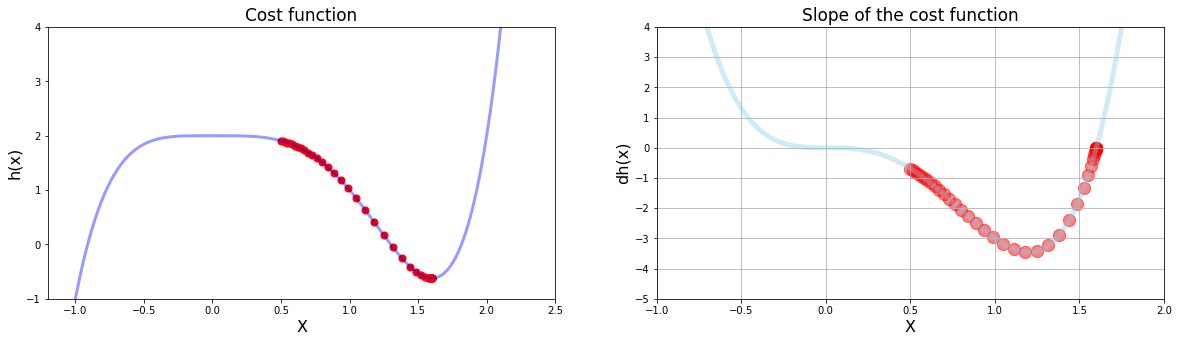

local min occurs at: 1.59989731976583
cost at this minimum is: -0.6214398920511766
number of steps: 40


In [15]:
# calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(dh, 0.5, 0.02, 0.0001)


#plot fucntion and derivative and scatter side by side
#calling gradi

plt.figure(figsize=[20,5])

# 1 chart : Cost function
plt.subplot(1,2,1)
plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)
plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha = 0.4)

# values = np.array(x_list)
plt.scatter(list_x, h(np.array(list_x)), color = "red", s=50)

# 2 chart : Derivative 
plt.subplot(1,2,2)
plt.xlim(-1, 2)
plt.ylim(-5, 4)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5, alpha=0.4)
plt.scatter(list_x, deriv_list, color ="red", s = 150, alpha = 0.5)


plt.show()

print("local min occurs at:" , local_min)
print("cost at this minimum is:", h(local_min))
print("number of steps:", len(list_x))

# Learning Rate

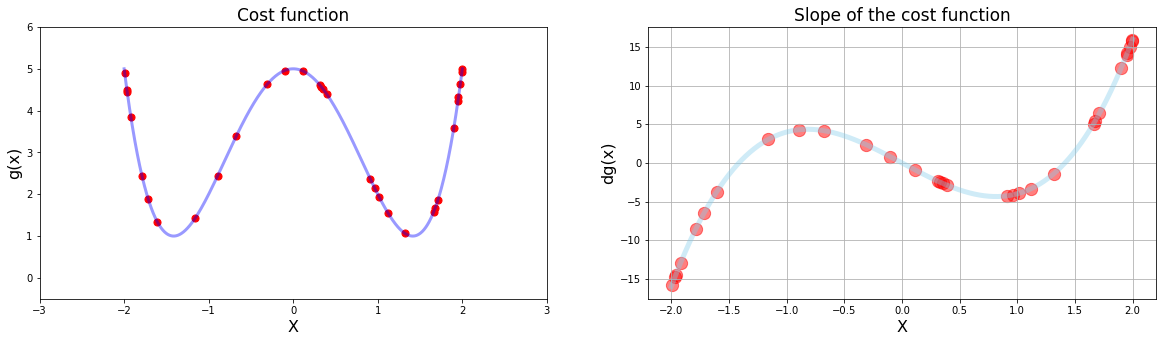

local min occurs at: 1.948618573984839
cost at this minimum is: 1.2591786246781673
number of steps: 31


In [16]:
# calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(dg, initial_guess=1.9, multiplier=0.25, max_iter=30)


#plot fucntion and derivative and scatter side by side
#calling gradi

plt.figure(figsize=[20,5])

# 1 chart : Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([-0.5,6])

plt.title('Cost function', fontsize= 17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha = 0.4)

# values = np.array(x_list)
plt.scatter(list_x, g(np.array(list_x)), color = "red", s=50)

# 2 chart : Derivative 
plt.subplot(1,2,2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.4)
plt.scatter(list_x, deriv_list, color ="red", s = 150, alpha = 0.5)


plt.show()

print("local min occurs at:" , local_min)
print("cost at this minimum is:", h(local_min))
print("number of steps:", len(list_x))

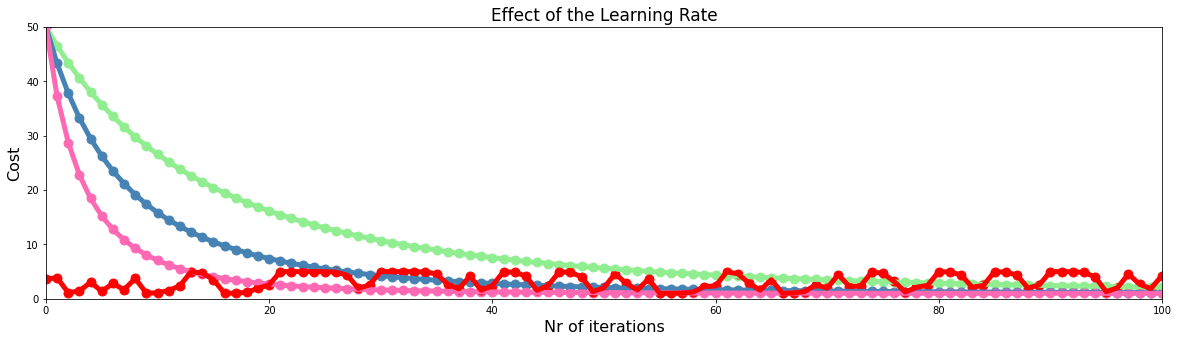

In [17]:
#Run Gradient descent 3 times

# calling gradient descent function
n =100
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, max_iter=n)
mid_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, max_iter=n)
#experiment
crazy_gamma = gradient_descent(dg, initial_guess=1.9, multiplier=0.2, max_iter=n)


#plot fucntion and derivative and scatter side by side
#calling gradi

plt.figure(figsize=[20,5])

# 1 chart : Cost function
# plt.subplot(1,2,1)
plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the Learning Rate', fontsize= 17)
plt.xlabel("Nr of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)


#Values for our charts
# 1) Y Axis data: convert the lists to numpy array
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
crazy_values = np.array(crazy_gamma[1])
# print(low_values)

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))


plt.plot(iteration_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(iteration_list, g(np.array(low_values)), color = "lightgreen", s=80)

plt.plot(iteration_list, g(mid_values), color="steelblue", linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_values)), color = "steelblue", s=80)

plt.plot(iteration_list, g(high_values), color="hotpink", linewidth=5)
plt.scatter(iteration_list, g(np.array(high_values)), color = "hotpink", s=80)

plt.plot(iteration_list, g(crazy_values), color="red", linewidth=5)
plt.scatter(iteration_list, g(np.array(crazy_values)), color = "red", s=80)

plt.show()

# Example 4 -Data Visualize with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [18]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [179]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)
print(f"shape of X array: {x_4.shape}")
x_4, y_4 = np.meshgrid(x_4, y_4)
print(f"Array after meshgrid: {x_4.shape}")
# x_4

shape of X array: (200,)
Array after meshgrid: (200, 200)


C:\Users\samit\AppData\Local\Temp/ipykernel_10984/1143100032.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


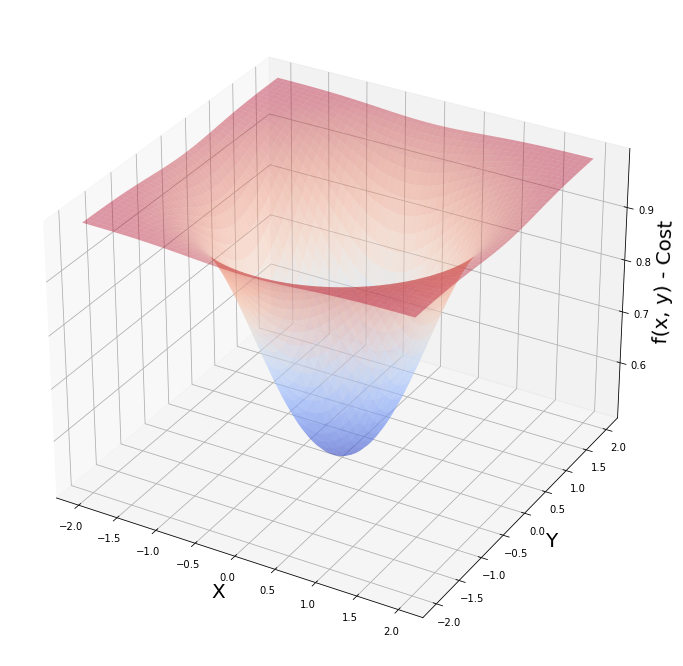

In [180]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")
ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) - Cost", fontsize=20 )
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

## Partial Derivatives and Symbolic computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$

## $$\frac{\partial f}{\partial y} = \frac{2y \ ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$

In [21]:
a, b = symbols("x, y")
print(f"Cost function f(x, y is: {f(a,b)}")
print("Derivative wrt x is :")
print(f"{diff(f(a,b), a)}")
print(f"Value of f(x, y) at x=1.8 , y=1.0 : {f(a, b).evalf(subs={a:1.8 , b:1.0})}")
print(f"Derivative of f(x, y) at x=1.8 , y=1.0 wrt x: {diff(f(a, b),a).evalf(subs={a:1.8 , b:1.0})}")

Cost function f(x, y is: 1/(3**(-x**2 - y**2) + 1)
Derivative wrt x is :
2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 , y=1.0 : 0.990604794032582
Derivative of f(x, y) at x=1.8 , y=1.0 wrt x: 0.0368089716197505


## Batch Gradient Descent with Sympy

In [25]:
# Setup
multiplier = 0.1
max_iter = 300
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print("values in gradient array", gradients)
print("Minimum occurs at x value of:", params[0])
print("Minimum occurs at y value of:", params[1])
print("The cost is:", f(params[0],params[1]))

values in gradient array [1.62362317394814e-6 9.02012874415637e-7]
Minimum occurs at x value of: 2.79340868698113e-6
Minimum occurs at y value of: 1.55189371498952e-6
The cost is: 0.500000000002805


## Batch Gradient Descent with Python (same function above)

In [27]:
#Partial derivative functions example 4 (as a python function ## Without Sympy)

def fpx(x,y):
    r= 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r= 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [32]:
# Setup
multiplier = 0.1
max_iter = 300
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print("values in gradient array", gradients)
print("Minimum occurs at x value of:", params[0])
print("Minimum occurs at y value of:", params[1])
print("The cost is:", f(params[0],params[1]))

values in gradient array [1.62362317e-06 9.02012874e-07]
Minimum occurs at x value of: 2.7934086869811193e-06
Minimum occurs at y value of: 1.5518937149895096e-06
The cost is: 0.5000000000028046


### So from the above two examples you can conclude, both answers are same regardless of the method

## Graphing 3D Gradient Descent and Adv Numpy Arrays

In [46]:
# Setup
multiplier = 0.1
max_iter = 300
params = np.array([1.8, 1.0])
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
#Results
print("values in gradient array", gradients)
print("Minimum occurs at x value of:", params[0])
print("Minimum occurs at y value of:", params[1])
print("The cost is:", f(params[0],params[1]))

values in gradient array [1.62362317e-06 9.02012874e-07]
Minimum occurs at x value of: 2.7934086869811193e-06
Minimum occurs at y value of: 1.5518937149895096e-06
The cost is: 0.5000000000028046


C:\Users\samit\AppData\Local\Temp/ipykernel_10984/2783169800.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


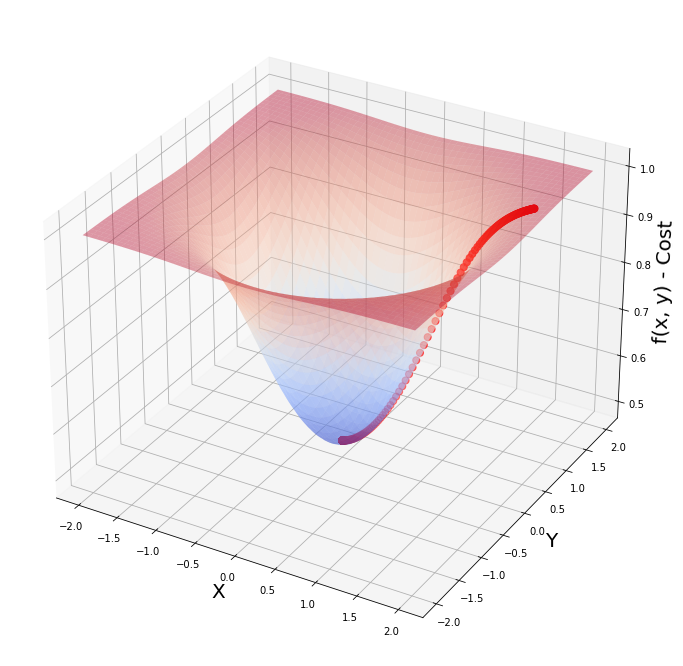

In [48]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")
ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) - Cost", fontsize=20 )
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0],values_array[:, 1]), s=50, color="red")

plt.show()

In [44]:
# Advanced Numpy Array Practice test:

test_array = np.array([["a","b"]])
print(test_array.shape)
test_array.reshape(2,1)

new_array = np.array([["1","2"],["3","4"]])
print(new_array.shape)

print("new_array[0] :", new_array[0])
print("new_array[0][1] :", new_array[0][1])
print("new_array[1][0] :", new_array[1][0])

the_roots = np.append(arr=new_array, values=test_array, axis=0)
print(the_roots)

(1, 2)
(2, 2)
new_array[0] : ['1' '2']
new_array[0][1] : 2
new_array[1][0] : 3
[['1' '2']
 ['3' '4']
 ['a' 'b']]


# Example 5 - Working with Data and a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^n \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^n \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^n \big(y - \hat{y} \big)^2 $$

In [184]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7,1)

print("Shape of x_5 array:", x_5.shape)
print("Shape of y_5 array:", y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [54]:
# Quick linear Regression

regr = LinearRegression()
regr.fit(x_5, y_5)
print("Theta 0 :", regr.intercept_[0])
print("Theta 1 :", regr.coef_[0][0])

Theta 0 : 0.8475351486029536
Theta 1 : 1.2227264637835915


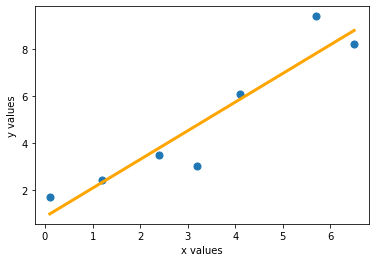

In [55]:
plt.scatter(x_5, y_5, s = 50)
plt.plot(x_5, regr.predict(x_5), color="orange", linewidth = 3)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [56]:
# y_hat = theta0 + thera1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print("Est values y_hat are: \n" , y_hat)
print("In comparison, the actual y values are \n", y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [64]:
# MSE function

def mse(y, y_hat):
    mse_calc = (1/y.size) * sum((y - y_hat) ** 2)
    return mse_calc
    
#method 2 using numpy

# def mse(y, y_hat):
#     mse_calc = np.average((y-y_hat)**2, axis=0)
#     return mse_calc

#method 3 using inbuilt func sklearn


In [67]:
print("MSE using function :", mse(y_5, y_hat))
print("MSE using sklearn : ", mean_squared_error(y_5, y_hat))


MSE using function : [0.94796558]
MSE using sklearn :  0.9479655759794577


## 3D Plot for the MSE Cost Function

# Make data for thetas

In [93]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop=3, num=nr_thetas)
th_1 = np.linspace(start = -1, stop=3, num=nr_thetas)
plot_t0 ,  plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

In [86]:
plot_t1

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.91836735, -0.91836735, -0.91836735, ..., -0.91836735,
        -0.91836735, -0.91836735],
       [-0.83673469, -0.83673469, -0.83673469, ..., -0.83673469,
        -0.83673469, -0.83673469],
       ...,
       [ 2.83673469,  2.83673469,  2.83673469, ...,  2.83673469,
         2.83673469,  2.83673469],
       [ 2.91836735,  2.91836735,  2.91836735, ...,  2.91836735,
         2.91836735,  2.91836735],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

### Calc MSE using nested for loops

In [192]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
plot_cost

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        print(y_hat)
        #y_hat will be like [[-1.1][-2.2][-3.4][-4.2][-5.1][-6.7][-7.5]] and so on
        plot_cost[i][j] = mse(y_5, y_hat)
print("Shape of plot_t0", plot_t0.shape)
print("Shape of plot_t1", plot_t1.shape)
print("Shape of plot_cost",plot_cost.shape)

[[-1.1]
 [-2.2]
 [-3.4]
 [-4.2]
 [-5.1]
 [-6.7]
 [-7.5]]
[[-1.0798995]
 [-2.1798995]
 [-3.3798995]
 [-4.1798995]
 [-5.0798995]
 [-6.6798995]
 [-7.4798995]]
[[-1.09798995]
 [-2.1758794 ]
 [-3.35175879]
 [-4.13567839]
 [-5.01758794]
 [-6.58542714]
 [-7.36934673]]
[[-1.07788945]
 [-2.15577889]
 [-3.33165829]
 [-4.11557789]
 [-4.99748744]
 [-6.56532663]
 [-7.34924623]]
Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


C:\Users\samit\AppData\Local\Temp/ipykernel_10984/3246020211.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


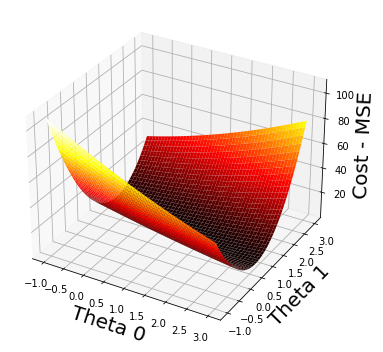

In [95]:
# Plotting MSE
fig = plt.figure(figsize=[6,12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [101]:
print("Min value of plot_cost",plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print("Min occurs at (i,j):",ij_min)
print("Min MSE for Theta 0 at plot_t0[111][91]", plot_t0[111][91])
print("Min MSE for Theta 1 at plot_t1[111][91]", plot_t1[111][91])

Min value of plot_cost 0.9483826526747163
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


C:\Users\samit\AppData\Local\Temp/ipykernel_10984/1927262415.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


## Partial derivative of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0 - \theta_1 x^{(i)}\big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0 - \theta_1 x^{(i)}\big) \big( x^{(i)} \big)$$

## MSE and Gradient Descent

In [102]:
# x values, y values, array of theta parameters (theta_0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y- thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y- thetas[0] - thetas[1]*x)*x)
    
#     return np.array([theta0_slope[0], theta1_slope[0]])
#     return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [106]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#collect data point for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # append the new values to our numpy array
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] +thetas[1]*x_5))
    
#Results
print("Min occurs at Theta 0 :", thetas[0])
print("Min occurs at Theta 1 :", thetas[1])
print("MSE is :", mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0 : 0.8532230461743415
Min occurs at Theta 1 : 1.2214935332607393
MSE is : [0.94797511]


C:\Users\samit\AppData\Local\Temp/ipykernel_10984/1056221581.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


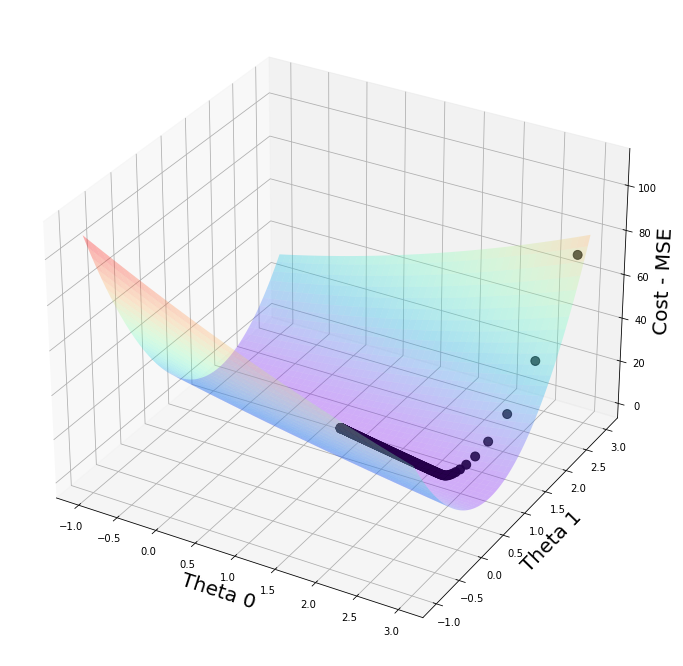

In [135]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80, color="black")
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.3)
plt.show()

## Meshgrid example

In [185]:
x = np.linspace(1,4,2)
y = np.linspace(5,12, 3)
xv, yv = np.meshgrid(x,y)
xv

array([[1., 4.],
       [1., 4.],
       [1., 4.]])